In [2]:
from faster_rcnn.datasets.factory import get_imdb
import faster_rcnn.roi_data_layer.roidb as rdl_roidb
from faster_rcnn.roi_data_layer.layer import RoIDataLayer
from faster_rcnn.fast_rcnn.config import cfg, cfg_from_file

import cv2
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [3]:
# load config
cfg_file = 'experiments/cfgs/faster_rcnn_end2end.yml'
cfg_from_file(cfg_file)

In [8]:
imdb_name = 'kittivoc_trainval'

# load data
imdb = get_imdb(imdb_name)
rdl_roidb.prepare_roidb(imdb)
roidb = imdb.roidb
# roidb is a database, containing bounding box info for all training images

num_images = len(imdb.image_index)

<bound method kittivoc.default_roidb of <faster_rcnn.datasets.kittivoc.kittivoc object at 0x7f30074ee910>>
Remove empty annotations:  005066 004339 004040 003383 001752 001091 000547 Done. 
kittivoc_trainval gt roidb loaded from /home/zjwang/git/faster_rcnn_pytorch/data/cache/kittivoc_trainval_gt_roidb.pkl


In [5]:
print len(roidb) # roidb is a list of dictionaries. Length is the entire number of images

7474


In [6]:
print roidb[0]

{'gt_classes': array([1], dtype=int32), 'dontcare_areas': array([], shape=(0, 4), dtype=int32), 'max_classes': array([1]), 'image': '/home/zjwang/git/faster_rcnn_pytorch/data/KITTIVOC/JPEGImages/000000.jpg', 'boxes': array([[712, 143, 810, 307]], dtype=int32), 'flipped': False, 'width': 1224, 'gt_ishard': array([0], dtype=int32), 'max_overlaps': array([1.], dtype=float32), 'height': 370, 'seg_areas': array([16335.], dtype=float32), 'gt_overlaps': <1x4 sparse matrix of type '<type 'numpy.float32'>'
	with 1 stored elements in Compressed Sparse Row format>}


In [17]:
mean_pixel = 0

for i in range(num_images):
    im_path = imdb.image_path_at(i)
    folder = im_path[0:-10]
    img_name = im_path[-10:-3]
    img_name += 'png'
    disp_path = folder + 'disparity/' + img_name # path to disparity map
    
    # read disparity
    disp = cv2.imread(disp_path) # raw image is still 3-channel (identical channels)
    disp = disp[:,:,0]
    
    mean_pixel += np.mean(disp) / num_images

print mean_pixel

31.904516738698213


-25.9 35.1


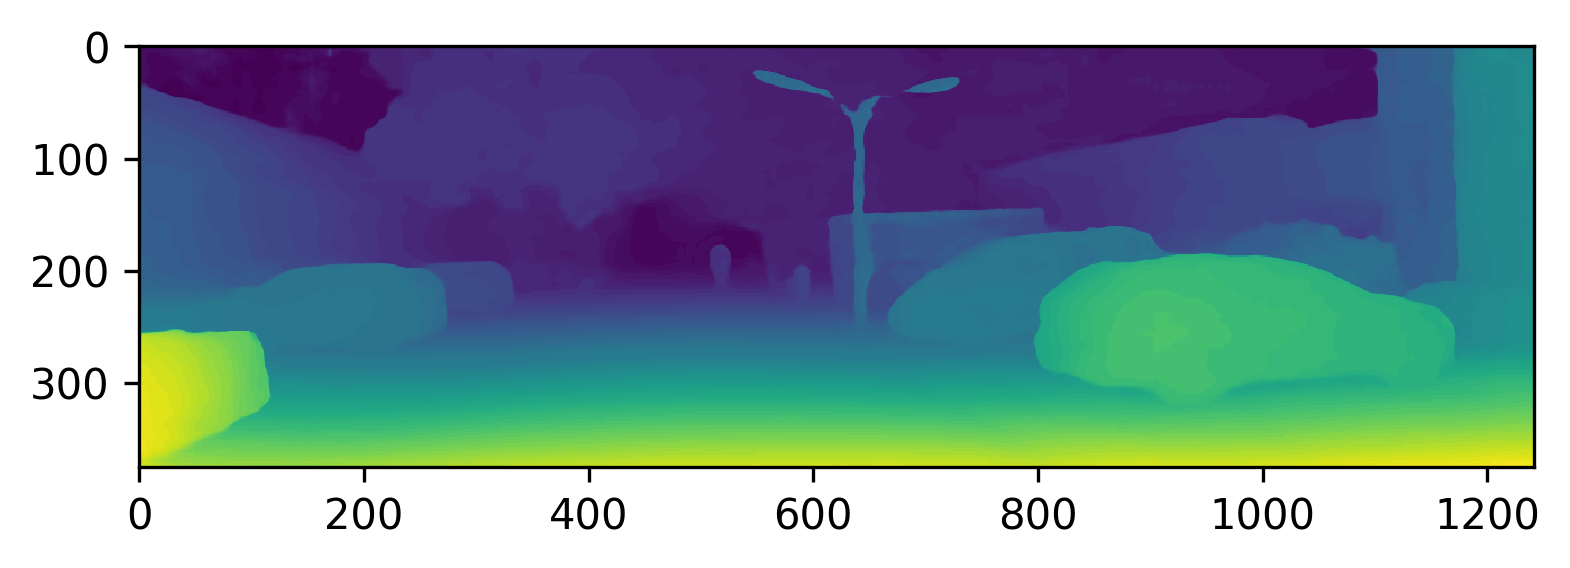

In [26]:
## Randomly visualize the disparity after substracting mean
i = np.random.randint(0, num_images, 1)[0]

im_path = imdb.image_path_at(i)
folder = im_path[0:-10]
img_name = im_path[-10:-3]
img_name += 'png'
disp_path = folder + 'disparity/' + img_name # path to disparity map

# read disparity
disp = cv2.imread(disp_path) # raw image is still 3-channel (identical channels)
disp = disp[:,:,0]
disp = disp.astype(np.float32)
disp -= 31.90

print np.min(disp), np.max(disp)

plt.imshow(np.int8(disp))